In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision

from PIL import Image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet101(weights=None).to(device)
model.fc = nn.Sequential(
               nn.Linear(2048, 128),
               nn.ReLU(inplace=True),
               nn.Linear(128, 2)).to(device)

model.load_state_dict(torch.load("/content/drive/MyDrive/machine learning projects/monkey pox/weight/resnet(101).h5"), strict=False) #모델 저장 위치 바꾸기 여기서 resnet(18, 50, 101)구분 잘하기

<All keys matched successfully>

In [ ]:
import os
test_mon= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/test/monkeypox")
print(test_mon)
test_oth= os.listdir("/content/drive/MyDrive/machine learning projects/training set/monkey pox/test/others")
print(test_oth)
classes = ['others', 'monkeypox']
print(classes)
#이건 테스트할 테스트 데이터 셋인데 저장해둔 사진 파일 위치 올려놓기

['monkeypox103.png', 'monkeypox102.png', 'monkeypox109.png', 'monkeypox13.png', 'monkeypox126.png', 'monkeypox122.png', 'monkeypox116.png', 'monkeypox119.png', 'monkeypox114.png', 'monkeypox169.png', 'monkeypox142.png', 'monkeypox154.png', 'monkeypox182.png', 'monkeypox183.png', 'monkeypox187.png', 'monkeypox212.png', 'monkeypox199.png', 'monkeypox20.png', 'monkeypox208.png', 'monkeypox22.png', 'monkeypox2.png', 'monkeypox217.png', 'monkeypox219.png', 'monkeypox21.png', 'monkeypox226.png', 'monkeypox234.png', 'monkeypox266.png', 'monkeypox255.png', 'monkeypox257.png', 'monkeypox262.png', 'monkeypox263.png', 'monkeypox3.png', 'monkeypox52.png', 'monkeypox42.png', 'monkeypox76.png', 'monkeypox61.png', 'monkeypox80.png', 'monkeypox60.png', 'monkeypox83.png', 'monkeypox79.png', 'monkeypox74.png', 'monkeypox59.png', 'monkeypox73.png', 'monkeypox6.png', 'monkeypox58.png', 'monkeypox99.png', 'monkeypox85.png', 'monkeypox88.png', 'mo_0007.jpg', 'mo_0013.jpg', 'mo_0068.jpg', 'mo_0061.jpg', 'mo_

In [ ]:
mon_list = [Image.open( "/content/drive/MyDrive/machine learning projects/training set/monkey pox/test/monkeypox/" + img_path) for img_path in test_mon]
oth_list = [Image.open( "/content/drive/MyDrive/machine learning projects/training set/monkey pox/test/others/" +img_path) for img_path in test_oth]
print(oth_list)
#위에 문장에서 파일명을 받았으니 파일명과 나머지 주소를 합치는 과정

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11397850>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11397390>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA113976D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11397090>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA113973D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11397290>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11397650>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11397E50>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11397710>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA113223D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11322550>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FBA11322950>, <PIL.PngImagePlugin.PngImag

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'test':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        normalize
    ]),
}
#이미지 전처리 과정인데 여기서 'test' 부분으로 test데이터셋 resize해서 이미지 크기 평준화 시키는곳

In [ ]:
validation_batch1 = torch.stack([data_transforms['test'](img).to(device)
                                for img in mon_list])
validation_batch2 = torch.stack([data_transforms['test'](img).to(device)
                                for img in oth_list])
#이건 내가 위에꺼가 원숭이두창, 나머지로 원숭이두창, 나머지의 결과가 어떻게 나오나 보려고 나눠둔것 validation_batch한개만 있어도 상관 없음

In [ ]:
pred_logits_tensor = model(validation_batch1)
pred_logits_tensor


tensor([[ 2.0903, -0.4451],
        [-3.1681,  3.6510],
        [ 0.5835,  0.6956],
        [ 0.3877,  0.3753],
        [-2.5561,  3.1505],
        [ 2.7463, -0.8340],
        [-4.7845,  5.9715],
        [-3.6870,  3.6386],
        [ 0.9612,  0.2336],
        [-0.9884,  1.9151],
        [-2.1039,  3.4385],
        [-1.5399,  2.4990],
        [-3.1876,  2.7587],
        [-4.4019,  3.9698],
        [ 1.2241, -0.0766],
        [-1.1134,  1.8260],
        [-0.2249,  1.1814],
        [-6.1138,  6.2820],
        [-4.1110,  4.0425],
        [-1.1329,  1.9814],
        [-0.9352,  1.9910],
        [ 1.8581, -0.1209],
        [-4.1542,  3.8278],
        [-0.0573,  0.7557],
        [-0.4625,  1.8859],
        [-0.0336,  1.3119],
        [-2.6513,  4.4957],
        [-3.2415,  3.2090],
        [-1.3465,  2.0558],
        [-0.0645,  0.9233],
        [-2.7787,  3.6201],
        [ 0.6847,  0.6949],
        [ 0.3240,  1.0438],
        [-0.1759,  1.1908],
        [ 0.4857,  0.5565],
        [-1.5973,  2

In [ ]:
pred_probs = F.softmax(pred_logits_tensor, dim=1).cpu().data.numpy()
pred_probs
#여기다가 100곱하면 %나옴

array([[9.2658538e-01, 7.3414594e-02],
       [1.0914369e-03, 9.9890852e-01],
       [4.7201389e-01, 5.2798611e-01],
       [5.0310558e-01, 4.9689448e-01],
       [3.3129200e-03, 9.9668711e-01],
       [9.7288632e-01, 2.7113745e-02],
       [2.1315436e-05, 9.9997866e-01],
       [6.5801950e-04, 9.9934191e-01],
       [6.7428625e-01, 3.2571369e-01],
       [5.1983472e-02, 9.4801658e-01],
       [3.9017294e-03, 9.9609828e-01],
       [1.7312290e-02, 9.8268765e-01],
       [2.6087228e-03, 9.9739122e-01],
       [2.3128204e-04, 9.9976867e-01],
       [7.8594100e-01, 2.1405895e-01],
       [5.0242864e-02, 9.4975710e-01],
       [1.9680887e-01, 8.0319107e-01],
       [4.1356748e-06, 9.9999583e-01],
       [2.8763074e-04, 9.9971229e-01],
       [4.2523805e-02, 9.5747620e-01],
       [5.0871614e-02, 9.4912833e-01],
       [8.7857753e-01, 1.2142246e-01],
       [3.4141689e-04, 9.9965858e-01],
       [3.0726451e-01, 6.9273549e-01],
       [8.7195411e-02, 9.1280454e-01],
       [2.0661139e-01, 7.

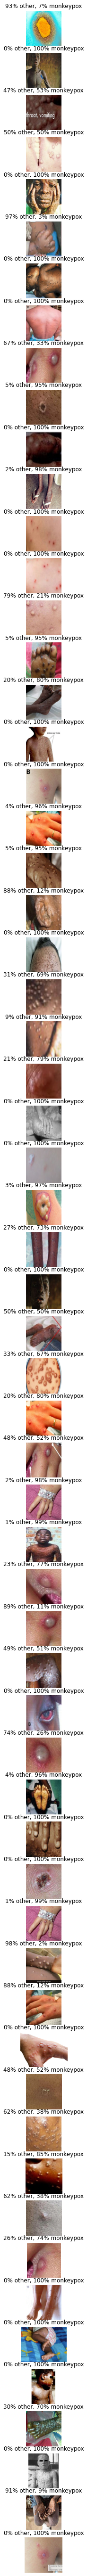

In [ ]:
fig, axs = plt.subplots(len(mon_list), 1, figsize=(150, 100))
for i, img in enumerate(mon_list):
    ax = axs[i]
    ax.axis('off')
    ax.set_title("{:.0f}% other, {:.0f}% monkeypox".format(100*pred_probs[i,0],
                                                            100*pred_probs[i,1]))
    ax.imshow(img)